color set #4292c6 for most figure
for heatmap use that #08306b', '#08519c', '#2171b5', '#4292c6', '#6baed6', '#9ecae1'
the beautiful and harmonious blue

In [6]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import csv
#import statsmodels.api as sm
import scipy.stats as stats
import math
import os

In [7]:
# Read in the drug resistance data 
PI_data = pd.read_csv("https://hivdb.stanford.edu/download/GenoPhenoDatasets/PI_DataSet.txt", sep="\t")
NRTI_data = pd.read_csv("https://hivdb.stanford.edu/_wrapper/download/GenoPhenoDatasets/NRTI_DataSet.txt", sep="\t")
NNRTI_data = pd.read_csv("https://hivdb.stanford.edu/_wrapper/download/GenoPhenoDatasets/NNRTI_DataSet.txt", sep="\t")
INI_data = pd.read_csv("https://hivdb.stanford.edu/_wrapper/download/GenoPhenoDatasets/INI_DataSet.txt", sep="\t")

In [8]:
## Count numbers of different types of mutations to gain insights for further data processing.

def whole_mutation_number(data):   
    """Count the whole numbers of mutation pairs""" 
    count_whole = 0

    for row in data["CompMutList"]:
        for pair in str(row).split(","):
            count_whole += 1

    print(f"Number of whole mutations: {count_whole}")

def one_end(data):
    """Count pairs with only one mutated AA"""
    count = 0

    for row in data["CompMutList"]:
        for pair in str(row).split(","):
            last_two_chars = pair[-2:]
            if re.match(r'[\d][A-Z]', last_two_chars):
                count += 1
                
    print(f"Number of pairs with only one mutated AA: {count}")
    
def two_end(data):
    """Count pairs with two mixed mutated AAs"""
    count = 0

    for row in data["CompMutList"]:
        for pair in str(row).split(","):
            last_three_chars = pair[-3:]
            if re.match(r'[\d][A-Z][A-Z]', last_three_chars):
                count += 1
                
    print(f"Number of pairs with two mixed mutated AAs: {count}")
    
def three_end(data):
    """count pairs with three mixed mutated AAs"""
    count = 0

    for row in data["CompMutList"]:
        for pair in str(row).split(","):
            last_four_chars = pair[-4:]
            if re.match(r'[\d][A-Z][A-Z][A-Z]', last_four_chars):
                count += 1
                
    print(f"Number of pairs with three mixed mutated AAs: {count}")

def other_end(data):
    """Count pairs with other kind of mutations which are represented by other characters"""
    count = 0


    for row in data["CompMutList"]:
        for pair in str(row).split(","):
            last_one_chars = pair[-1:]
            if not re.match('[ACDEFGHIKLMNPQRSTVWY]', last_one_chars):
                count+=1
                print(pair, count)
            
    print(f"Number of pairs with others characters at the end: {count}")   
    
def count_mutation(data):
    """Count numbers of different types of mutations"""
    whole_mutation_number(data)
    one_end(data)
    two_end(data)
    three_end(data)
    other_end(data)

count_mutation(PI_data)
count_mutation(INI_data)
count_mutation(NRTI_data)
count_mutation(NNRTI_data)


Number of whole mutations: 25949
Number of pairs with only one mutated AA: 21888
Number of pairs with two mixed mutated AAs: 3931
Number of pairs with three mixed mutated AAs: 119
 L63X 1
 N37X 2
E35X 3
 N37X 4
 K20X 5
 C67X 6
 L33L* 7
 N37X 8
 H69X 9
 G86X 10
 N37X 11
 N37X 12
 A71X 13
 N37X 14
 K20X 15
 N37X 16
 C67X 17
 N37X 18
 A71X 19
 G73X 20
 D60X 21
nan 22
 N37X 23
 K14K* 24
 G16X 25
 G73X 26
 I72X 27
 L63X 28
W6X 29
 E21E* 30
 Q61X 31
 Q61X 32
 L89X 33
 G94X 34
 I72X 35
 L63X 36
W6W* 37
 I13X 38
L10X 39
 K20X 40
 T12X 41
 N37X 42
 K20X 43
 L19X 44
 L63X 45
 I64X 46
 G73X 47
 N37X 48
P9X 49
 E65X 50
 L63X 51
 T12X 52
 N37X 53
nan 54
 L89X 55
 G73X 56
 G73X 57
 N37X 58
 K14K* 59
 N37X 60
N37X 61
 K14X 62
 E34X 63
 L63X 64
 N37X 65
 N37X 66
 L63X 67
 P39X 68
 N37X 69
 P39X 70
 L63X 71
Q2Q* 72
L10X 73
 I72X 74
 K20X 75
 H69X 76
 V82X 77
 P79X 78
 L89X 79
 L89X 80
 N37X 81
 N37X 82
 A71X 83
 L63X 84
L10X 85
 L63X 86
 V82X 87
 N37X 88
 N37X 89
 L19X 90
 V82X 91
L10X 92
 N37X 93
 I72

In [12]:
# Function to count mutations
def count_mutations(data):
    total_mutations = 0
    single_mutations_count = 0
    multiple_mutations_count = 0
    
    for index, row in data.iterrows():
        mutations = row['CompMutList'].split(', ')
        mutation_count = len(mutations)
        
        total_mutations += mutation_count
        if mutation_count == 1:
            single_mutations_count += 1
        elif mutation_count > 1:
            multiple_mutations_count += 1
            
    return total_mutations, single_mutations_count, multiple_mutations_count

# Analyze each dataset
datasets = [PI_data, NRTI_data, NNRTI_data, INI_data]
results = {}

for i, dataset in enumerate(['PI', 'NRTI', 'NNRTI', 'INI']):
    total_mutations, single_mutations, multiple_mutations = count_mutations(datasets[i])
    results[dataset] = {
        "Total Mutations": total_mutations,
        "Single Mutations": single_mutations,
        "Multiple Mutations": multiple_mutations
    }

# Output results
for dataset in results:
    print(f"{dataset} Dataset:")
    for key, value in results[dataset].items():
        print(f"{key}: {value}")
    print()

AttributeError: 'float' object has no attribute 'split'

In [13]:
#Print the CompMutList contents
print(PI_data['CompMutList'])


0                                        D30N, R57G, N88D
1                            D30N, M46I, R57G, L63P, N88D
2                            M46I, R57G, L63P, V82T, I84V
3                      L10R, M46I, R57G, L63P, V82T, I84V
4                      L10I, R57G, L63P, A71V, I84V, L90M
                              ...                        
2390    L10I, I13IV, G16GE, V32I, L33F, N37S, M46L, K5...
2391                               L10I, M46I, L76V, I84V
2392    T12S, I15V, L19I, M36I, R41K, K45N, I50L, L63P...
2393    I13V, K20T, E35N, M36I, N37E, I62V, L63P, K70R...
2394    L10I, I13IV, L24F, L33F, E35D, M36I, N37ND, R4...
Name: CompMutList, Length: 2395, dtype: object


explain for the first sample>
"D30N", "R57G", and "N88D" are descriptions of mutations in the HIV virus, usually referring to amino acid changes in the HIV protein.
"D30N" refers to a mutation in the 30th position of aspartic acid (D, Aspartic Acid) in the HIV protein to asparagine (N, Asparagine).
"R57G" refers to the mutation of arginine (R, Arginine) at position 57 to glycine (G, Glycine) in the HIV protein.
"N88D" refers to a mutation in HIV protein at position 88 from asparagine (N, Asparagine) to aspartic acid (D, Aspartic Acid).


In [14]:
dataset_names = ['PI', 'NRTI', 'NNRTI', 'INI']
datasets = [PI_data, NRTI_data, NNRTI_data, INI_data]
print(dataset_names)

['PI', 'NRTI', 'NNRTI', 'INI']


Frequency of Multiple Mutation Number in PI:
    Number of Mutations  Frequency
0                     2         73
1                     3        101
2                     4        143
3                     5        177
4                     6        159
5                     7        156
6                     8        134
7                     9        143
8                    10        123
9                    11        142
10                   12        124
11                   13        110
12                   14        106
13                   15         97
14                   16        117
15                   17         97
16                   18         85
17                   19         67
18                   20         56
19                   21         41
20                   22         34
21                   23         32
22                   24         13
23                   25         15
24                   26         11
25                   27          5
26        

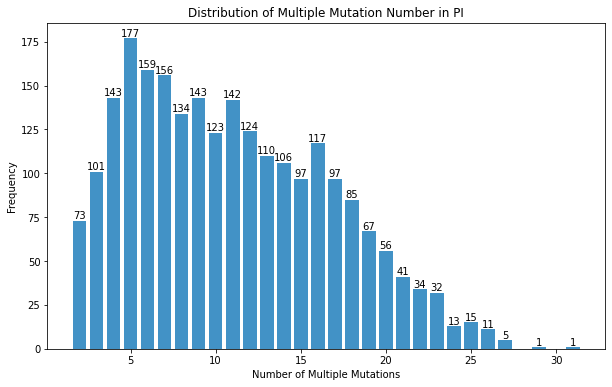

Frequency of Multiple Mutation Number in NRTI:
    Number of Mutations  Frequency
0                     2         13
1                     3         16
2                     4         23
3                     5         58
4                     6         56
5                     7         78
6                     8         96
7                     9         97
8                    10         84
9                    11        111
10                   12        104
11                   13        111
12                   14        120
13                   15        109
14                   16        122
15                   17        114
16                   18         86
17                   19        113
18                   20         82
19                   21         95
20                   22         80
21                   23         65
22                   24         58
23                   25         45
24                   26         44
25                   27         41
26      

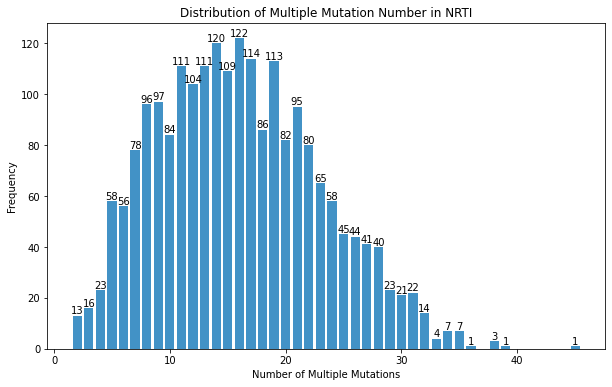

Frequency of Multiple Mutation Number in NNRTI:
    Number of Mutations  Frequency
0                     2         34
1                     3         23
2                     4         35
3                     5         87
4                     6         58
5                     7         79
6                     8         99
7                     9         97
8                    10         88
9                    11        112
10                   12        114
11                   13        112
12                   14        120
13                   15        110
14                   16        120
15                   17        109
16                   18         86
17                   19        111
18                   20         87
19                   21        100
20                   22         86
21                   23         68
22                   24         58
23                   25         50
24                   26         48
25                   27         43
26     

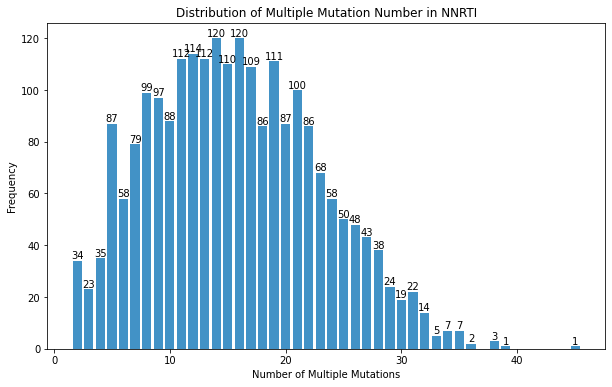

Frequency of Multiple Mutation Number in INI:
    Number of Mutations  Frequency
0                     2         37
1                     3         13
2                     4         33
3                     5         73
4                     6         50
5                     7        101
6                     8         65
7                     9         41
8                    10         44
9                    11         35
10                   12         34
11                   13         27
12                   14         21
13                   15         16
14                   16         11
15                   17         19
16                   18         12
17                   19          5
18                   20          5
19                   22          1
20                   23          6
21                   24          3
22                   25          1
23                   27          1


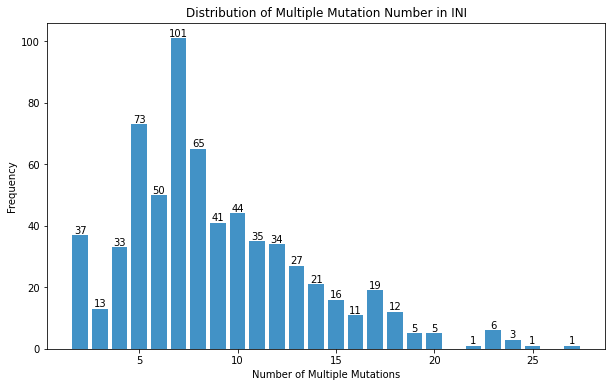

In [ ]:
# Function to count mutations, handling NaN values to avoid errors
def count_mutations(variant):
    if pd.isna(variant):
        return 0
    return len(variant.split(','))

# process data for each dataset
def process_and_plot_data(dataset, dataset_name):
    dataset['Mutation_Number'] = dataset['CompMutList'].apply(count_mutations)

    #excluding single mutations
    multiple_mutation_counts = dataset[dataset['Mutation_Number'] > 1]['Mutation_Number'].value_counts().sort_index()

    # Create a DataFrame to store the number of mutations and their frequencies
    multiple_mutation_df = pd.DataFrame({
        'Number of Mutations': multiple_mutation_counts.index, 
        'Frequency': multiple_mutation_counts.values
    })

    print(f"Frequency of Multiple Mutation Number in {dataset_name}:")
    print(multiple_mutation_df)

    # visualize the distribution of mutation numbers
    plt.figure(figsize=(10, 6))
    bars = plt.bar(multiple_mutation_counts.index, multiple_mutation_counts.values, color='#4292c6')

    # Add annotations
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

    plt.xlabel("Number of Multiple Mutations")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Multiple Mutation Number in {dataset_name}")

    # Save the plot
    save_dir = f"C:\\Users\\64242\\Desktop\\projectprotein\\DataDistribution\\{dataset_name}"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, f'Distribution of Multiple Mutation Number in {dataset_name}.png'))
    plt.show()

# Loop through each dataset with its corresponding name
for data, name in zip(datasets, dataset_names):
    process_and_plot_data(data, name)


In [ ]:
# # Apply the function to create a new column for mutation counts
# PI_data['Mutation_Number'] = PI_data['CompMutList'].apply(count_mutations)

# # Calculate the frequency of each mutation count excluding single mutations
# multiple_mutation_counts = PI_data[PI_data['Mutation_Number'] != 1]['Mutation_Number'].value_counts().sort_index()


# # Create a DataFrame to store the number of mutations and their corresponding frequencies
# multiple_mutation_df = pd.DataFrame({
#     'Number of Mutations': multiple_mutation_counts.index, 
#     'Frequency': multiple_mutation_counts.values
# })

# print("Frequency of Multiple Mutation Number in PI_data:")
# print(multiple_mutation_df)

# # Plot a bar graph to visualize the distribution of mutation numbers
# plt.figure(figsize=(10, 6))  # Set size
# bars = plt.bar(multiple_mutation_counts.index, multiple_mutation_counts.values, color='blue')

# # Add annotations
# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

# plt.xlabel("Number of Multiple Mutations")
# plt.ylabel("Frequency")
# plt.title("Distribution of Multiple Mutation Number in PI_data")

# # save
# save_dir = "C:\\Users\\64242\\Desktop\\projectprotein\\DataDistribution"
# if not os.path.exists(save_dir):
#     os.makedirs(save_dir)
# plt.savefig(os.path.join(save_dir, 'Distribution of Multiple Mutation Number in PI_data.png'))
# plt.show()

https://www.nature.com/articles/nature17995/figures/7
According to this article, it can be found that the protein retain activity better at 2, 3, 4, and 5, with reduced activity from 6 to 10, and a basic loss of activity with mutations greater than 10.
The black part of the graph indicates reduced activity
So according to this, the dataset is mutiple as 2, 3, 4, 5, 6 - 10, greater than 10, 6 parts, and statistically its distribution

Frequency of Multiple Mutation Categories in PI:
  Multiple Mutation Category  Frequency
0                2 mutations         73
1                3 mutations        101
2                4 mutations        143
3                5 mutations        177
4             6-10 mutations        715
5  greater than 10 mutations       1154


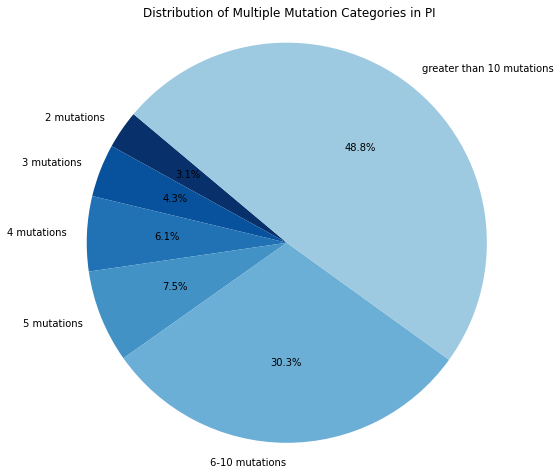

Frequency of Multiple Mutation Categories in NRTI:
  Multiple Mutation Category  Frequency
0                2 mutations         13
1                3 mutations         16
2                4 mutations         23
3                5 mutations         58
4             6-10 mutations        411
5  greater than 10 mutations       1644


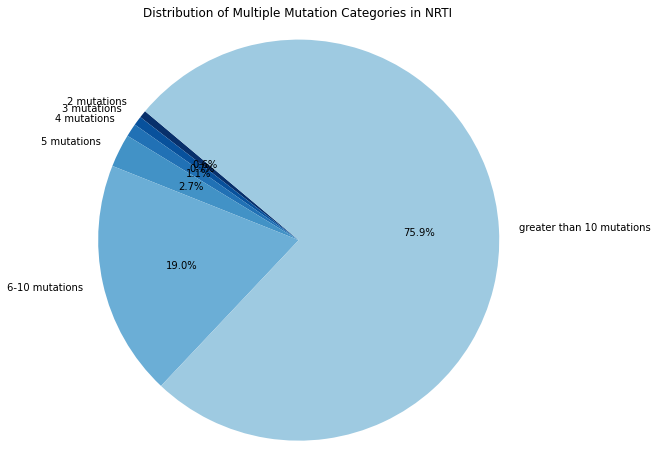

Frequency of Multiple Mutation Categories in NNRTI:
  Multiple Mutation Category  Frequency
0                2 mutations         34
1                3 mutations         23
2                4 mutations         35
3                5 mutations         87
4             6-10 mutations        421
5  greater than 10 mutations       1677


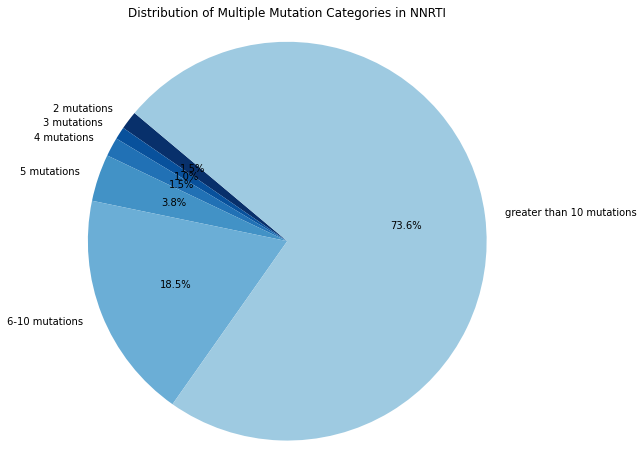

Frequency of Multiple Mutation Categories in INI:
  Multiple Mutation Category  Frequency
0                2 mutations         37
1                3 mutations         13
2                4 mutations         33
3                5 mutations         73
4             6-10 mutations        301
5  greater than 10 mutations        197


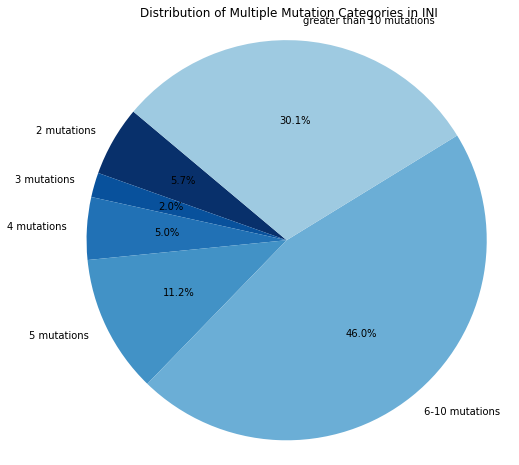

In [ ]:
# Define categorization function
def categorize_mutations(count):
    if count == 2:
        return '2 mutations'
    elif count == 3:
        return '3 mutations'
    elif count == 4:
        return '4 mutations'
    elif count == 5:
        return '5 mutations'
    elif 6 <= count <= 10:
        return '6-10 mutations'
    elif count > 10:
        return 'greater than 10 mutations'
    else:
        return 'Other'

# Process data for each dataset
def process_and_visualize_data(dataset, dataset_name):
    dataset['Mutation_Number'] = dataset['CompMutList'].apply(count_mutations)
    dataset['Mutation_Category'] = dataset['Mutation_Number'].apply(categorize_mutations)

    # Filter out 'Other' and single mutations
    filtered_data = dataset[dataset['Mutation_Number'] > 1]
    filtered_data = filtered_data[filtered_data['Mutation_Category'] != 'Other']

    # Calculate the frequency
    category_counts = filtered_data['Mutation_Category'].value_counts().sort_index()

    # Create a DataFrame for the table
    category_df = pd.DataFrame({
        'Multiple Mutation Category': category_counts.index,
        'Frequency': category_counts.values
    })

    print(f"Frequency of Multiple Mutation Categories in {dataset_name}:")
    print(category_df)

    # Plot a pie chart
    blue_shades = ['#08306b', '#08519c', '#2171b5', '#4292c6', '#6baed6', '#9ecae1']
    plt.figure(figsize=(8, 8))
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=blue_shades)
    plt.title(f'Distribution of Multiple Mutation Categories in {dataset_name}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Save the plot
    save_dir = f"C:\\Users\\64242\\Desktop\\projectprotein\\DataDistribution\\{dataset_name}"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, f'Multiple Mutation Category Distribution in {dataset_name}.png'))
    plt.show()

# Loop through each dataset with its corresponding name
for data, name in zip(datasets, dataset_names):
    process_and_visualize_data(data, name)

In [ ]:
# # Define categorization function
# def categorize_mutations(count):
#     if count == 2:
#         return '2 mutations'
#     elif count == 3:
#         return '3 mutations'
#     elif count == 4:
#         return '4 mutations'
#     elif count == 5:
#         return '5 mutations'
#     elif 6 <= count <= 10:
#         return '6-10 mutations'
#     elif count > 10:
#         return 'greater than 10 mutations'
#     else:
#         return 'Other'
    
# PI_data['Mutation_Category'] = multiple_mutation_counts.apply(categorize_mutations)
# #
# # Calculate the frequency of each mutation category
# category_counts = filtered_data['Mutation_Category'].value_counts().sort_index()

# # Create a DataFrame for the table
# category_df = pd.DataFrame({
#     'Multiple Mutation Category': category_counts.index, 
#     'Frequency': category_counts.values
# })

# print("Frequency of Multiple Mutation Categories in PI_data:")
# print(category_df)

# # Plot a pie chart
# blue_shades = ['#08306b', '#08519c', '#2171b5', '#4292c6', '#6baed6', '#9ecae1']
# plt.figure(figsize=(8, 8))
# plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=blue_shades)
# plt.title('Distribution of Multiple Mutation Categories in PI_data')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# # Save the plot
# if not os.path.exists(save_dir):
#     os.makedirs(save_dir)
# plt.savefig(os.path.join(save_dir, 'Multiple Mutation Category Distribution in PI_data.png'))
# plt.show()

well, try to draw the heatmap
X axis represents the wild type amino acids, and the y axis represents the mutation amino acids
Although there are more than 300 wild amino acids in the world, there are only 20 in the human 
ref. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC329120/
Amino acid list set to C S T P A G N D E Q H R K M I L V F Y W 

Mutation pairs occurring more than 200 times in PI:
T -> S: 242 times
A -> V: 744 times
G -> S: 227 times
N -> S: 227 times
N -> D: 440 times
D -> E: 230 times
E -> D: 740 times
Q -> E: 232 times
R -> K: 859 times
K -> T: 249 times
K -> R: 782 times
K -> I: 217 times
M -> I: 1393 times
M -> L: 280 times
I -> L: 1206 times
I -> V: 3604 times
L -> P: 1636 times
L -> M: 986 times
L -> I: 1157 times
L -> V: 403 times
L -> F: 695 times
V -> A: 485 times
V -> I: 1029 times


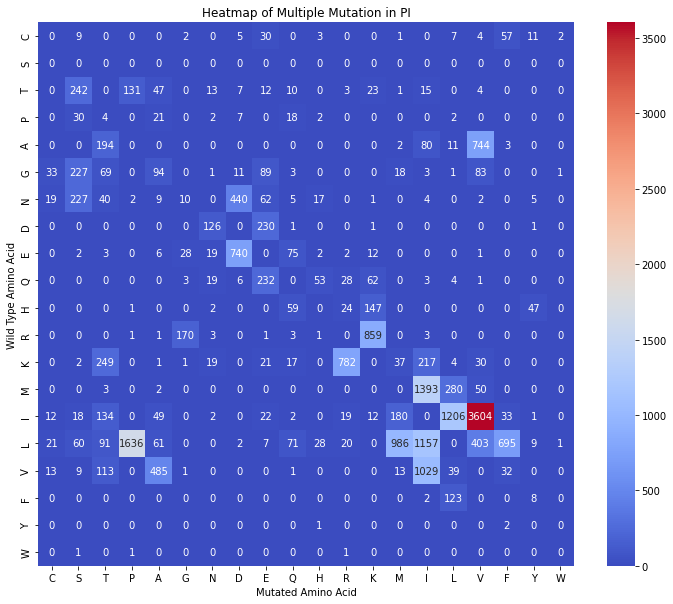

Mutation pairs occurring more than 200 times in NRTI:
S -> C: 227 times
T -> A: 1197 times
T -> D: 225 times
T -> F: 223 times
T -> Y: 753 times
A -> S: 392 times
A -> P: 835 times
G -> E: 426 times
D -> N: 803 times
D -> E: 1181 times
E -> A: 258 times
E -> D: 707 times
E -> K: 601 times
Q -> E: 510 times
H -> Y: 262 times
R -> K: 1225 times
K -> N: 668 times
K -> E: 1460 times
K -> Q: 644 times
K -> R: 1881 times
M -> L: 888 times
M -> V: 1016 times
I -> T: 518 times
I -> L: 277 times
I -> V: 1302 times
L -> H: 249 times
L -> I: 302 times
L -> W: 584 times
V -> T: 249 times
V -> E: 221 times
V -> M: 277 times
V -> I: 1776 times
F -> L: 345 times
Y -> C: 285 times


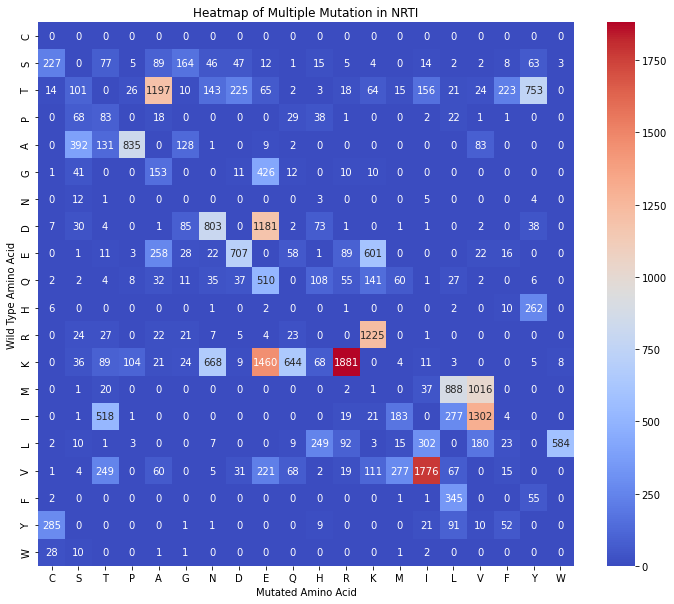

Mutation pairs occurring more than 200 times in NNRTI:
S -> C: 279 times
T -> A: 1248 times
T -> D: 230 times
T -> F: 220 times
T -> Y: 749 times
A -> S: 383 times
A -> P: 831 times
G -> E: 432 times
D -> N: 810 times
D -> E: 1207 times
E -> A: 264 times
E -> D: 783 times
E -> K: 584 times
Q -> E: 517 times
H -> Y: 260 times
R -> K: 1250 times
K -> N: 696 times
K -> E: 1496 times
K -> Q: 689 times
K -> R: 1955 times
M -> L: 882 times
M -> V: 1011 times
I -> T: 544 times
I -> L: 276 times
I -> V: 1400 times
L -> H: 245 times
L -> I: 318 times
L -> W: 578 times
V -> T: 287 times
V -> E: 229 times
V -> M: 282 times
V -> I: 1862 times
F -> L: 338 times
Y -> C: 305 times


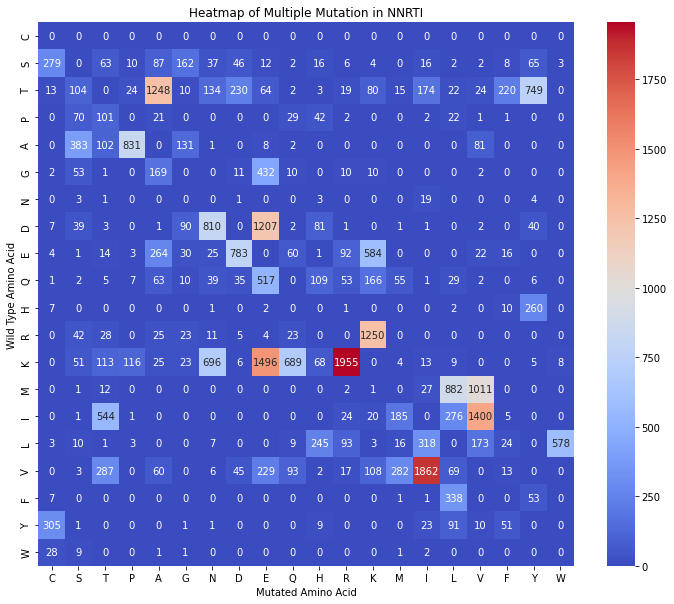

Mutation pairs occurring more than 200 times in INI:
S -> G: 204 times
T -> A: 419 times
E -> D: 230 times
K -> R: 229 times
I -> V: 439 times
L -> I: 348 times
V -> I: 391 times


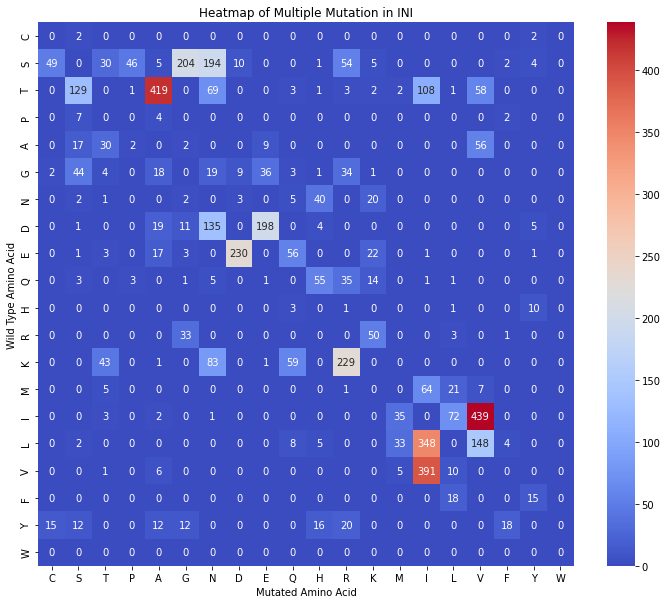

In [15]:
amino_acids = 'CSTPAGNDEQHRKMILVFYW'

def parse_and_count_mutations(dataset, dataset_name):
    # Initialize to count mutations
    mutation_counts = {aa: {mut: 0 for mut in amino_acids} for aa in amino_acids}
    
    # Iterate over each row in the dataset
    for mutations in dataset['CompMutList'].dropna():
        if not isinstance(mutations, str):
            continue  # Ensure is string format
        
        # Split mutations by comma and iterate over each mutation
        mut_list = mutations.split(', ')
        if len(mut_list) > 1:  # Only consider multiple mutations
            for mut in mut_list:
                if len(mut) >= 3 and mut[0].isalpha() and mut[-1].isalpha() and mut[1:-1].isdigit():
                    #Check that the format of the mutation,
                    #first character is a letter, last character is a letter, and the middle character is a number
                    # add the count to one based on the amino acid type of the mutation
                    wild, pos, mut_aa = mut[0], mut[1:-1], mut[-1]
                    if wild in amino_acids and mut_aa in amino_acids:
                        mutation_counts[wild][mut_aa] += 1
    
    return mutation_counts

def plot_heatmap(mutation_counts, dataset_name, threshold=200):
    # Convert mutation counts to a matrix for heatmap plotting
    mutation_matrix = np.array([[mutation_counts[w][m] for m in amino_acids] for w in amino_acids])
    
    # Identify and display mutation pairs exceeding the frequency threshold
    print(f"Mutation pairs occurring more than {threshold} times in {dataset_name}:")
    for from_index, row in enumerate(mutation_matrix):
        for to_index, count in enumerate(row):
            if count > threshold:
                from_aa = amino_acids[from_index]
                to_aa = amino_acids[to_index]
                print(f"{from_aa} -> {to_aa}: {count} times")
    
    # Generate and show the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(mutation_matrix, annot=True, fmt="d", cmap='coolwarm', xticklabels=list(amino_acids), yticklabels=list(amino_acids))
    plt.title(f"Heatmap of Multiple Mutation in {dataset_name}")
    plt.xlabel('Mutated Amino Acid')
    plt.ylabel('Wild Type Amino Acid')
    
    # Save the plot
    save_dir = f"C:\\Users\\64242\\Desktop\\projectprotein\\DataDistribution\\{dataset_name}"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, f'Heatmap of Multiple Mutation in {dataset_name}.png'))
    plt.show()
# Execute mutation parsing and heatmap plotting for each dataset
for dataset, dataset_name in zip(datasets, dataset_names):
    mutation_counts = parse_and_count_mutations(dataset, dataset_name)
    plot_heatmap(mutation_counts, dataset_name)

Mutation pairs occurring more than 100% times in PI:
A -> V: 3.20%
N -> S: 4.80%
N -> D: 1.60%
E -> D: 4.00%
R -> G: 6.40%
R -> K: 4.80%
K -> R: 5.60%
M -> I: 2.40%
I -> L: 6.40%
I -> V: 16.80%
L -> S: 3.20%
L -> P: 15.20%
L -> A: 1.60%
L -> Q: 1.60%
L -> M: 1.60%
L -> I: 3.20%
L -> V: 1.60%
L -> F: 1.60%
V -> I: 5.60%


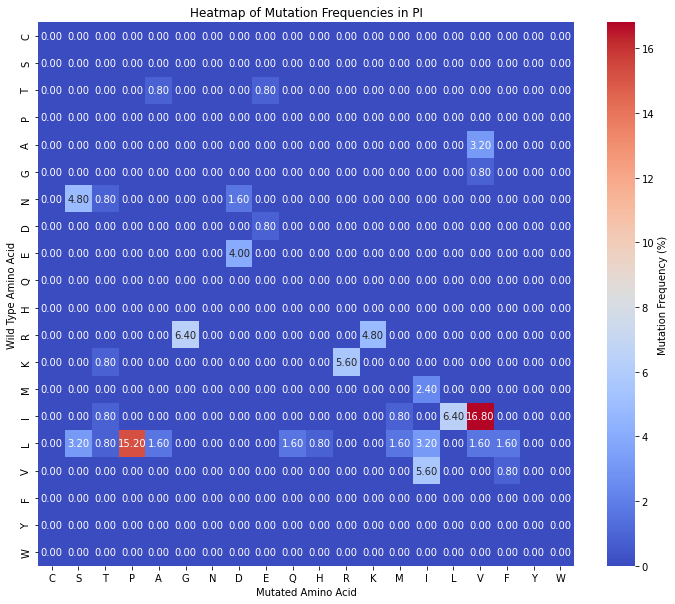

Mutation pairs occurring more than 100% times in NRTI:
S -> G: 12.50%
A -> V: 12.50%
D -> N: 12.50%
K -> E: 25.00%
K -> R: 37.50%


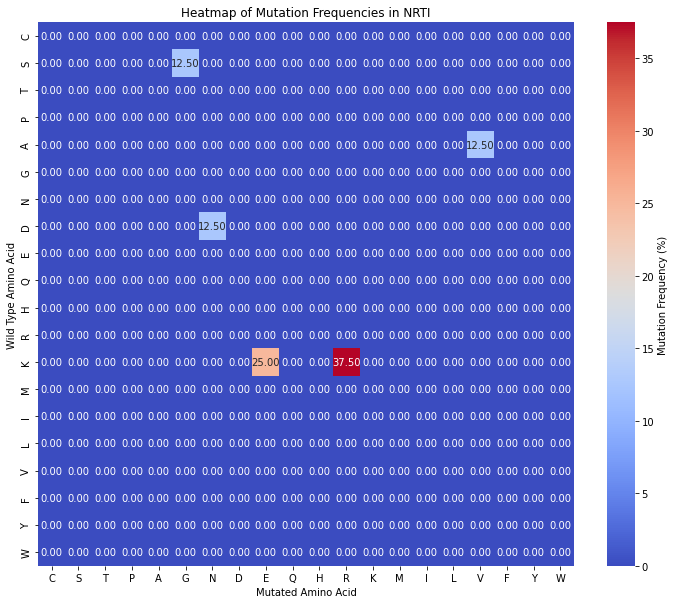

Mutation pairs occurring more than 100% times in NNRTI:
D -> N: 50.00%
K -> E: 50.00%


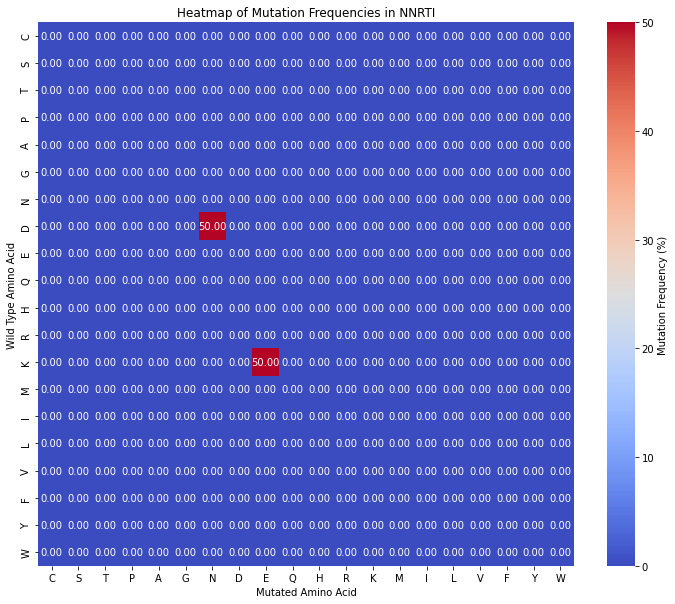

Mutation pairs occurring more than 100% times in INI:
T -> A: 32.26%
T -> I: 19.35%
E -> Q: 16.13%
M -> I: 3.23%
I -> A: 3.23%
L -> Q: 3.23%
L -> M: 16.13%
L -> I: 3.23%
V -> I: 3.23%


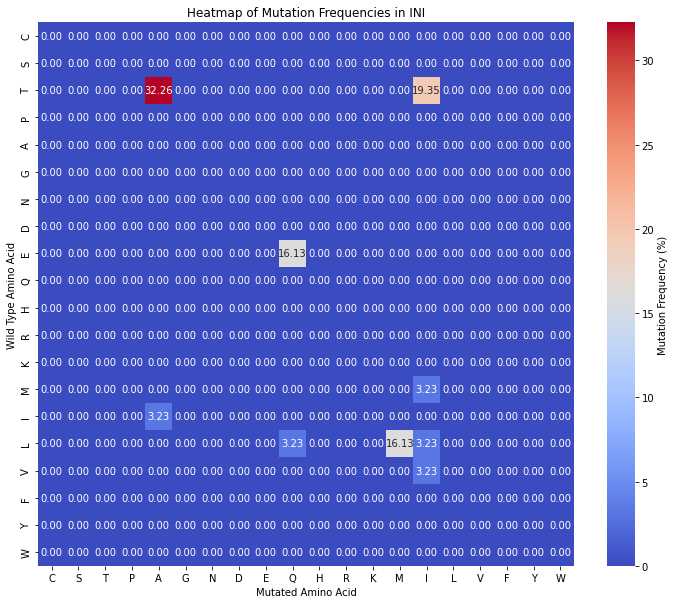

In [20]:
def parse_and_count_mutations(dataset, dataset_name):
    # Initialize a dictionary to count mutations
    mutation_counts = {aa: {mut: 0 for mut in amino_acids} for aa in amino_acids}
    # Iterate over the dataset's mutation list
    for mutations in dataset['CompMutList'].dropna():
        if not isinstance(mutations, str):
            continue  # Skip non-string data
        
        mut_list = mutations.split(', ')
        if len(mut_list) == 2:  # Focus two mutations
            for mut in mut_list:
                if len(mut) == 3 or (len(mut) == 4 and mut[1:-1].isdigit()):
                    wild, pos, mut_aa = mut[0], mut[1:-1], mut[-1]
                    if wild in amino_acids and mut_aa in amino_acids:
                        mutation_counts[wild][mut_aa] += 1
    
    return mutation_counts

def plot_heatmap(mutation_counts, dataset_name, threshold=1):
    # Convert the mutation counts into a matrix for heatmap plotting
    mutation_matrix = np.array([[mutation_counts[w][m] for m in amino_acids] for w in amino_acids])
    # Calculate the total number of mutations to convert counts into percentages
    total_mutations = np.sum(mutation_matrix)
    mutation_percentages = (mutation_matrix / total_mutations) * 100

    # Display mutation pairs that exceed the frequency threshold
    print(f"Mutation pairs occurring more than {threshold*100}% times in {dataset_name}:")
    for from_index, row in enumerate(mutation_percentages):
        for to_index, percent in enumerate(row):
            if percent > threshold:
                from_aa = amino_acids[from_index]
                to_aa = amino_acids[to_index]
                print(f"{from_aa} -> {to_aa}: {percent:.2f}%")
    
    # Generate and show the heatmap
    plt.figure(figsize=(12, 10))
    ax = sns.heatmap(mutation_percentages, annot=True, fmt=".2f", cmap='coolwarm', 
                      xticklabels=list(amino_acids), yticklabels=list(amino_acids),
                      cbar_kws={'label': 'Mutation Frequency (%)'})
    plt.title(f"Heatmap of Mutation Frequencies in {dataset_name}")
    plt.xlabel('Mutated Amino Acid')
    plt.ylabel('Wild Type Amino Acid')
    
    # Ensure the save directory exists and save the plot
    save_dir = f"C:\\Users\\64242\\Desktop\\projectprotein\\DataDistribution\\{dataset_name}"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, f'Heatmap of Two Mutation Cases in {dataset_name}.png'))
    plt.show()

# Apply the functions to each dataset
for dataset, dataset_name in zip(datasets, dataset_names):
    mutation_counts = parse_and_count_mutations(dataset, dataset_name)
    plot_heatmap(mutation_counts, dataset_name)
